# Sequências aleatórias

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Função de Matriz Principal
Tomaremos um array de tamanho n, no qual n seja divisivel por 60. 

In [3]:
def matriz(num_colunas, array1):
    """
    Gera uma matriz sequencial a partir de um array, com o número de colunas especificado.

    Args:
        array (list ou np.ndarray): Array de entrada.
        num_colunas (int): Número de colunas desejado na matriz.

    Returns:
        np.ndarray: Matriz sequencial.
    """
    if num_colunas > len(array1):
        raise ValueError("O número de colunas não pode ser maior que o tamanho do array.")

    # Número de linhas na matriz
    num_linhas = len(array1) - num_colunas + 1

    # Criando a matriz sequencial
    matriz = np.array([array1[i:i + num_colunas] for i in range(num_linhas)])
    return matriz

### Teste 1
* Cria-se um array com entrada n = 1200
* Transforma-se esse array em uma matriz com tamanho de colunas fixo num_colunas = 60
* Espera-se retorno de uma matriz com tamanho 1141x60

In [4]:
array_teste = np.arange(1, 1201)
print("Tamanho array de teste:", len(array_teste))
matriz_teste = matriz(60, array_teste)
print(f'Shape matriz de teste:{matriz_teste.shape}')

Tamanho array de teste: 1200
Shape matriz de teste:(1141, 60)


## Carregando dados para testes
Aqui carrega-se uma data especifica de algum de dia de coleta e realize-se o ajuste necessários.

In [13]:
data = pd.read_csv('/home/ozielramos/Documentos/Out/dados/Saidas/FUNCOES/DOUBLE - 17_09_s1.csv')

In [6]:
data.head()

,"22,11","0,5","0,5.1",1,BET,Entrada,Odd,P60,P120,P180,...,P(1),P(0),LOG(P(1);2),LOG(P(2);2),Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130
0,0,"22,11","-0,25",1,0,"1,83",0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"22,11",-1,0,0,"1,07",0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"22,11","1,75",2,0,"24,83",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"22,11","1,75",2,0,"25,25",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"22,11","1,75",2,0,"8,55",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
array_data = []
for i in range(1200):
    trip = data['Entrada'][i].replace(',', '.')
    if float(trip) >= 4:
        odd = 1
    else:
        odd = 0
    array_data.append(odd)
print("Tamanho array de teste:", len(array_data))
matriz_data = matriz(60, array_data)
print(f'Shape matriz de teste:{matriz_data.shape}')

Tamanho array de teste: 1200
Shape matriz de teste:(1141, 60)


## Função para calcular o grau de entropia de um array
Para calcular o grau de entropia de um array e verificar o quão aleatório ele é, podemos usar o conceito de entropia de Shannon, que mede a incerteza ou imprevisibilidade dos dados. Quanto maior a entropia, mais aleatório é o array.

In [8]:
import numpy as np
from collections import Counter
import math

def calcular_entropia(array):
    # Conta a frequência de cada elemento no array
    contador = Counter(array)
    total_elementos = len(array)
    
    entropia = 0.0
    
    for count in contador.values():
        # Calcula a probabilidade de cada elemento
        probabilidade = count / total_elementos
        # Adiciona à entropia: -p * log2(p)
        entropia -= probabilidade * math.log2(probabilidade)
    
    return entropia

def verificar_aleatoriedade(array, limiar=0.7):
    """
    Verifica se um array é aleatório com base na entropia.
    
    Parâmetros:
    - array: Lista ou array numpy a ser analisado.
    - limiar: Valor entre 0 e 1 que define o quão alta a entropia deve ser para ser considerada aleatória.
              Quanto mais próximo de 1, mais aleatório o array precisa ser.
    
    Retorna:
    - True se a entropia for alta (acima do limiar), False caso contrário.
    - O valor da entropia normalizada (entre 0 e 1).
    """
    if len(array) == 0:
        return False, 0.0
    
    entropia = calcular_entropia(array)
    
    # Calcula a entropia máxima possível (log2 do número de elementos únicos)
    elementos_unicos = len(set(array))
    if elementos_unicos <= 1:
        return False, 0.0  # Sem variação, entropia zero
    
    entropia_maxima = math.log2(elementos_unicos)
    entropia_normalizada = entropia / entropia_maxima
    
    # Verifica se a entropia está acima do limiar
    return entropia_normalizada >= limiar, entropia_normalizada

### Teste 2
Teste para verificar a entropia de um array

In [9]:
# Exemplo 1: Array com baixa entropia (não aleatório)
array1 = [1, 1, 1, 1, 1, 1, 1, 1]
resultado1, entropia_norm1 = verificar_aleatoriedade(array1)
print(f"Array1 é aleatório? {resultado1} (Entropia normalizada: {entropia_norm1:.4f})")

# Exemplo 2: Array com alta entropia (aleatório)
array2 = np.random.randint(0, 256, 1000)  # 1000 números aleatórios entre 0 e 255
resultado2, entropia_norm2 = verificar_aleatoriedade(array2)
print(f"Array2 é aleatório? {resultado2} (Entropia normalizada: {entropia_norm2:.4f})")

Array1 é aleatório? False (Entropia normalizada: 0.0000)
Array2 é aleatório? True (Entropia normalizada: 0.9790)


### Explicação

1. **Cálculo da Entropia**:
   - A entropia de Shannon é calculada como $-\sum p(x) \log_2 p(x)$, onde $p(x)$ é a probabilidade de um elemento $x$ no array.
   - Quanto mais uniforme a distribuição dos elementos, maior a entropia.

2. **Normalização**:
   - A entropia é normalizada pela entropia máxima possível (que ocorre quando todos os elementos são igualmente prováveis).
   - Se `entropia_normalizada ~= 1`, o array é considerado aleatório.

3. **Limiar (Threshold)**:
   - Um limiar (padrão `0.8`) é usado para decidir se o array é suficientemente aleatório. Você pode ajustar esse valor conforme necessário.

Esta função pode ser útil para verificar se um array contém padrões ou se é efetivamente aleatório. Quanto maior a entropia normalizada, mais imprevisível e aleatório é o array.


## Junção das duas bibliotecas com a data teste

In [10]:
resultado_data, entropia_norm_data = verificar_aleatoriedade(array_data)
print(f"Array_data é aleatório? {resultado_data} (Entropia normalizada: {entropia_norm_data:.4f})")

Array_data é aleatório? True (Entropia normalizada: 0.7937)


In [11]:
grafico_data = []
for i in range(matriz_data.shape[0]):
    resultado_data, entropia_norm_data = verificar_aleatoriedade(matriz_data[i])
    print(f"Array_data[{i}] é aleatório? {resultado_data} (Entropia normalizada: {entropia_norm_data:.4f})")
    grafico_data.append(entropia_norm_data)
print("Tamanho grafico_data:", len(grafico_data))

Array_data[0] é aleatório? False (Entropia normalizada: 0.6098)
Array_data[1] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[2] é aleatório? False (Entropia normalizada: 0.6873)
Array_data[3] é aleatório? False (Entropia normalizada: 0.6873)
Array_data[4] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[5] é aleatório? False (Entropia normalizada: 0.6098)
Array_data[6] é aleatório? False (Entropia normalizada: 0.6098)
Array_data[7] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[8] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[9] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[10] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[11] é aleatório? False (Entropia normalizada: 0.6500)
Array_data[12] é aleatório? False (Entropia normalizada: 0.6873)
Array_data[13] é aleatório? True (Entropia normalizada: 0.7219)
Array_data[14] é aleatório? True (Entropia normalizada: 0.7540)
Array_data[15] é aleatório? True (Ent

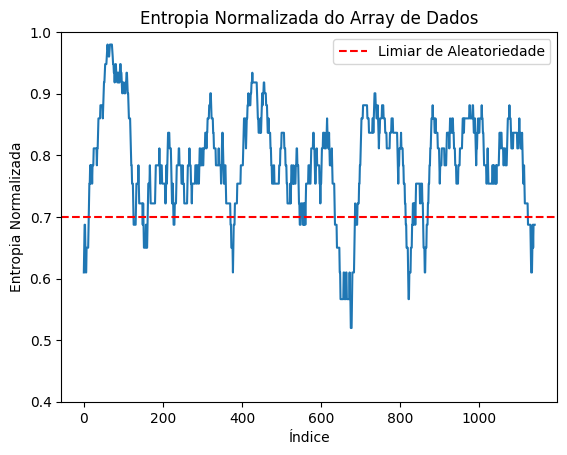

In [12]:
plt.plot(grafico_data)
plt.title('Entropia Normalizada do Array de Dados')
plt.xlabel('Índice')
plt.ylabel('Entropia Normalizada')
plt.ylim(0.4, 1)
plt.axhline(y=0.7, color='r', linestyle='--', label='Limiar de Aleatoriedade')
plt.legend()
plt.show()

## Criação de Sequências aleatórias para treinamento
Elaboraremos uma função que gera um banco de dados com sequências criadas artificialmente que tenham sequências aleatórias, com grau acima de 0.5

In [15]:
import random
from math import log2

def calcular_entropia(seq):
    n = len(seq)
    p0 = seq.count(0) / n
    p1 = seq.count(1) / n

    entropia = 0
    if p0 > 0:
        entropia -= p0 * log2(p0)
    if p1 > 0:
        entropia -= p1 * log2(p1)
    return entropia

def gerador_sequencias(n, limite_entropia=0.5):
    while True:
        seq = [random.randint(0, 1) for _ in range(n)]
        if calcular_entropia(seq) > limite_entropia:
            yield seq

# Exemplo de uso: gerar infinitamente, mas parar manualmente
gerador = gerador_sequencias(60, limite_entropia=0.5)

# Exibir as 10 primeiras
for i in range(10):
    seq = next(gerador)
    print(f"{i+1}: {seq} (entropia = {calcular_entropia(seq):.3f})")


1: [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0] (entropia = 0.997)
2: [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1] (entropia = 1.000)
3: [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1] (entropia = 0.971)
4: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] (entropia = 0.999)
5: [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0] (ent

## Teste em produção
Testar e combinar a produção do código

In [ ]:
for i in range(len(array_data)):
    if i >= 360 and (i % 60) == 0:
        
        
        matriz_teste1 = matriz(60, array_data[:i])
        break
print(f'Shape matriz de teste1:{matriz_teste1.shape}')
        

Shape matriz de teste1:(301, 60)


In [22]:
import numpy as np
from math import log2
import csv
import json
import os
from multiprocessing import Pool, cpu_count

# ---------- CONFIGURAÇÕES ----------
BITS = 60
LIMITE_ENTROPIA = 0.5
INTERVALO_1S = range(15, 22)  # entre 15 e 21 bits 1
TOTAL_SEQUENCIAS = 100_000
CHUNK_SIZE = 10_000
FORMATO_SAIDA = ['csv', 'npy', 'json']
PASTA_SAIDA = "saida_filtrada"
NUM_PROCESSOS = cpu_count()

# ---------- FUNÇÕES DE FILTRO ----------

def calcular_entropia_np(seq):
    n = len(seq)
    p0 = np.count_nonzero(seq == 0) / n
    p1 = np.count_nonzero(seq == 1) / n
    entropia = 0
    if p0 > 0:
        entropia -= p0 * log2(p0)
    if p1 > 0:
        entropia -= p1 * log2(p1)
    return entropia

def gerar_e_filtrar(_):
    seq = np.random.randint(0, 2, size=BITS)
    qtd_1s = np.count_nonzero(seq == 1)

    if qtd_1s in INTERVALO_1S:
        entropia = calcular_entropia_np(seq)
        if entropia > LIMITE_ENTROPIA:
            return seq.tolist(), round(entropia, 5)
    return None

def gerar_em_lote(total_desejado):
    resultados = []
    with Pool(processes=NUM_PROCESSOS) as pool:
        while len(resultados) < total_desejado:
            tentativas = total_desejado * 2
            lotes = pool.map(gerar_e_filtrar, range(tentativas))
            filtradas = [res for res in lotes if res is not None]
            resultados.extend(filtradas)
            resultados = resultados[:total_desejado]
    return resultados

# ---------- SALVAMENTO ----------

def salvar_em_csv(lista, nome_base):
    for i in range(0, len(lista), CHUNK_SIZE):
        chunk = lista[i:i + CHUNK_SIZE]
        path = os.path.join(PASTA_SAIDA, f"{nome_base}_{i//CHUNK_SIZE + 1}.csv")
        with open(path, mode='w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([f'bit_{j}' for j in range(BITS)] + ['entropia'])
            for seq, entropia in chunk:
                writer.writerow(seq + [entropia])

def salvar_em_npy(lista, nome_base):
    for i in range(0, len(lista), CHUNK_SIZE):
        chunk = np.array([seq for seq, _ in lista[i:i + CHUNK_SIZE]])
        path = os.path.join(PASTA_SAIDA, f"{nome_base}_{i//CHUNK_SIZE + 1}.npy")
        np.save(path, chunk)

def salvar_em_json(lista, nome_base):
    for i in range(0, len(lista), CHUNK_SIZE):
        chunk = [{"sequencia": seq, "entropia": ent} for seq, ent in lista[i:i + CHUNK_SIZE]]
        path = os.path.join(PASTA_SAIDA, f"{nome_base}_{i//CHUNK_SIZE + 1}.json")
        with open(path, "w") as f:
            json.dump(chunk, f, indent=2)

def salvar_todos_formatos(lista, nome_base="sequencias_filtradas"):
    os.makedirs(PASTA_SAIDA, exist_ok=True)
    if 'csv' in FORMATO_SAIDA:
        salvar_em_csv(lista, nome_base)
    if 'npy' in FORMATO_SAIDA:
        salvar_em_npy(lista, nome_base)
    if 'json' in FORMATO_SAIDA:
        salvar_em_json(lista, nome_base)

# ---------- EXECUÇÃO ----------

if __name__ == "__main__":
    print(f"🎯 Gerando {TOTAL_SEQUENCIAS} sequências de {BITS} bits")
    print(f"🧪 Filtros: entropia > {LIMITE_ENTROPIA} e entre 15 e 21 bits 1 (30% ±15%)")

    sequencias_filtradas = gerar_em_lote(TOTAL_SEQUENCIAS)

    print(f"💾 Salvando em: {', '.join(FORMATO_SAIDA)} (chunks de {CHUNK_SIZE})")
    salvar_todos_formatos(sequencias_filtradas)

    print(f"✅ Finalizado! Arquivos salvos em: ./{PASTA_SAIDA}/")


🎯 Gerando 100000 sequências de 60 bits
🧪 Filtros: entropia > 0.5 e entre 15 e 21 bits 1 (30% ±15%)
💾 Salvando em: csv, npy, json (chunks de 10000)
✅ Finalizado! Arquivos salvos em: ./saida_filtrada/
